In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('book.csv',encoding='ISO-8859-1',index_col=0)
df.rename(columns={'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},inplace=True)
df.head(-1)

,user_id,book_title,book_rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7


In [ ]:
df['book_rating'].isnull().sum()

0

In [ ]:
df.shape

(10000, 3)

In [ ]:
df['user_id'].nunique()

2182

In [ ]:
df['book_title'].nunique()

9659

In [ ]:
no_of_rated_movies_per_user = df.groupby(['user_id'])['book_rating'].count().sort_values(ascending=False)

In [ ]:
sum(no_of_rated_movies_per_user >= 50)

30

<Axes: xlabel='book_rating', ylabel='count'>

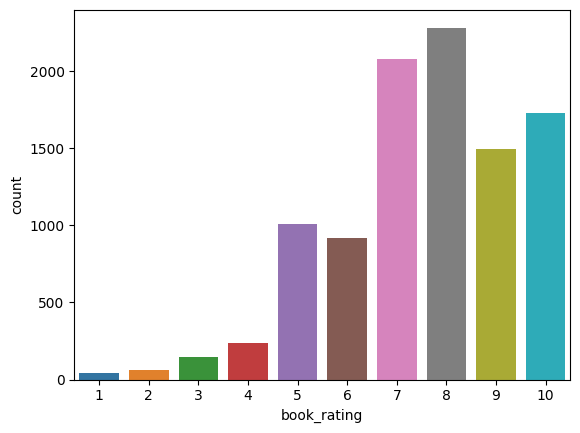

In [ ]:
# Distribution of book_rating

sns.countplot(x=df['book_rating'])

In [ ]:
df.shape

(10000, 3)

In [ ]:
# movie_mat = df.pivot_table(index='user_id',columns='book_title',values='book_rating')
# movie_mat.head(-1)

In [ ]:
df['book_title'][1]

'Classical Mythology'

In [ ]:
df[df['book_title'] == 'Fahrenheit 451']['book_rating']

180      2
2231     7
5590    10
7990     8
8192     8
Name: book_rating, dtype: int64

In [ ]:
df['book_title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: book_title, Length: 9659, dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
# df['rating_count'] = df.groupby('book_title')['book_rating'].transform('sum')
# df
# # df = df[df[xg] == True]
# # df
df['user_id'].value_counts() > 100

3757       True
162052     True
2276       True
4017       True
277427     True
          ...  
969       False
967       False
965       False
951       False
162129    False
Name: user_id, Length: 2182, dtype: bool

In [ ]:
# to know how many user has read more than 500 books
x =  df['user_id'].value_counts() > 50
y = x[x].index

users = df[df['user_id'].isin(y)]



In [ ]:
users

,user_id,book_title,book_rating
521,277203,The Fly on the Wall,8
522,277203,Cranford (The World's Classics),8
523,277203,The Red Tent (Bestselling Backlist),8
524,277203,The Right Hand of Amon,8
525,277203,Last Blue: Poems,8
...,...,...,...
9965,162052,Ali and Nino: A Love Story,5
9966,162052,Objects in Mirror Are Closer Than They Appear ...,7
9967,162052,Ragtime,9
9968,162052,The Man Who Ate the 747,10


In [ ]:
book_pivot = users.pivot_table(columns='book_title', index='user_id', values="book_rating",fill_value=0)
book_pivot.fillna(0, inplace=True)
book_pivot

book_title,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,"1,401 More Things That P*Ss Me Off",1001 Brilliant Ways to Checkmate,101 Essential Tips: House Plants,101 Wacky Computer Jokes,11 Edward Street,2010: Odyssey Two,22 Indigo Place,253,28 Barbary Lane : A \Tales of the City\ Omnibus,...,ZANZIBAR CAT,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen: A Way of Life (Teach Yourself Books),Zodiac: The Eco-Thriller,Zombie!,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Well, there's your problem\: Cartoons",Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1733,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
1903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
book_pivot.shape

(27, 2888)

In [ ]:
X = book_pivot.T
X

user_id,183,254,638,643,1211,1424,1733,1903,2033,2110,...,3827,4017,161041,161936,162052,277203,277427,278137,278188,278418
book_title,,,,,,,,,,,,,,,,,,,,,
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1,401 More Things That P*Ss Me Off",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
1001 Brilliant Ways to Checkmate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Essential Tips: House Plants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Wacky Computer Jokes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombie!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\More More More,\ Said the Baby",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
\O\ Is for Outlaw,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(2888, 10)

In [ ]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        , -0.10827702, -0.10995122, ..., -0.11052112,
        -0.11060673,  1.        ],
       [-0.10827702,  1.        , -0.10879789, ..., -0.10937543,
        -0.10945178, -0.10827702],
       [-0.10995122, -0.10879789,  1.        , ..., -0.11072721,
        -0.11123042, -0.10995122],
       ...,
       [-0.11052112, -0.10937543, -0.11072721, ...,  1.        ,
        -0.11196326, -0.11052112],
       [-0.11060673, -0.10945178, -0.11123042, ..., -0.11196326,
         1.        , -0.11060673],
       [ 1.        , -0.10827702, -0.10995122, ..., -0.11052112,
        -0.11060673,  1.        ]])

In [ ]:
correlation_book_ID = correlation_matrix[8]
correlation_book_ID

array([-0.06928333, -0.12705419,  0.15399175, ..., -0.10585336,
       -0.03073083, -0.06928333])

In [ ]:
Recommend = list(X.index[correlation_book_ID > 0.65])

Recommend[0:10]

['253',
 '2nd Chance',
 'A Boy Named Phyllis: A Suburban Memoir',
 'A Call to Conscience : The Landmark Speeches of Dr. Martin Luther King, Jr.',
 'A Caribbean Mystery',
 'A Cold Day for Murder',
 "A Cup of Tea (Ballantine Reader's Circle)",
 'A Density of Souls',
 'A Map of the World',
 "A Room of One's Own"]